PRAGADEESH M
225229126

In [7]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from keras.backend import categorical_crossentropy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

### 1.Import CIFAR-19 dataset from keras

In [8]:
from keras.datasets import cifar10

### 2.Split train and test sets

In [9]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


### 3.Convert ytrain and ytest to categorical values

In [10]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

### 4.Normalize X values by dividing it by 255

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### 5.Create the baseline model as below

In [12]:
model = Sequential()
##5x5 convolution with 2x2 stride and 32 filters
model.add(Conv2D(32,(5,5), strides = (2,2), padding = 'same' , input_shape=X_train.shape[1:]))
model.add(Activation('relu'))

##Another 5x5 convolution with 2x2 stride and 32 filters
model.add(Conv2D(32, (5,5), strides = (2,2)))
model.add(Activation('relu'))

##2x2 max pooling reduces to 3x3x32
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

##Flatten turns 3x3x32 into 288x1
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

### 6.Train the baseline model

In [18]:
batch_size = 32

#initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0005,decay=1e-6)

#lets train the model using RMSprop
model.compile(loss='categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])

In [19]:
history = model.fit(X_train,y_train,batch_size=batch_size,epochs=10,validation_data= (X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 31s 19ms/step - loss: 1.7337 - accuracy: 0.3679 - val_loss: 1.4232 - val_accuracy: 0.4960
Epoch 2/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4507 - accuracy: 0.4764 - val_loss: 1.2953 - val_accuracy: 0.5386
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.3393 - accuracy: 0.5202 - val_loss: 1.2858 - val_accuracy: 0.5411
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2685 - accuracy: 0.5528 - val_loss: 1.2439 - val_accuracy: 0.5608
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.2186 - accuracy: 0.5675 - val_loss: 1.1217 - val_accuracy: 0.6007
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1760 - accuracy: 0.5837 - val_loss: 1.0847 - val_accuracy: 0.6157
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1506 - accuracy: 0.5961 - val_loss: 1.1032 -

### 7.Define baseline Data Augmentation steps

In [20]:
datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)

datagen.fit(X_train)

In [21]:
history1=model.fit(datagen.flow(X_train,y_train,
                       batch_size = batch_size),
          steps_per_epoch=X_train.shape[0] // batch_size,
          epochs=15,
          validation_data = (X_test, y_test))

Epoch 1/15
1562/1562 [==============================] - 60s 38ms/step - loss: 1.2690 - accuracy: 0.5602 - val_loss: 1.0829 - val_accuracy: 0.6287
Epoch 2/15
1562/1562 [==============================] - 55s 35ms/step - loss: 1.2596 - accuracy: 0.5632 - val_loss: 1.0571 - val_accuracy: 0.6384
Epoch 3/15
1562/1562 [==============================] - 54s 35ms/step - loss: 1.2561 - accuracy: 0.5670 - val_loss: 1.0344 - val_accuracy: 0.6420
Epoch 4/15
1562/1562 [==============================] - 54s 35ms/step - loss: 1.2609 - accuracy: 0.5664 - val_loss: 1.0358 - val_accuracy: 0.6431
Epoch 5/15
1562/1562 [==============================] - 54s 35ms/step - loss: 1.2584 - accuracy: 0.5703 - val_loss: 1.0520 - val_accuracy: 0.6394
Epoch 6/15
1562/1562 [==============================] - 54s 35ms/step - loss: 1.2554 - accuracy: 0.5723 - val_loss: 1.0926 - val_accuracy: 0.6351
Epoch 7/15
1562/1562 [==============================] - 57s 36ms/step - loss: 1.2510 - accuracy: 0.5722 - val_loss: 1.0398 -

### 8.Answer the Questions

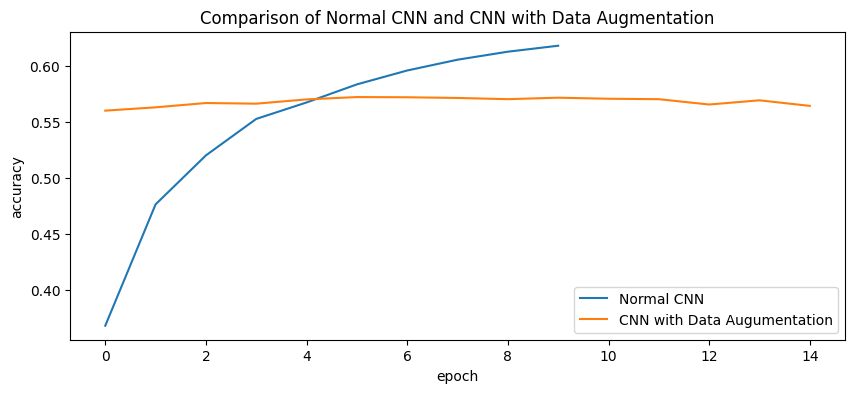

In [22]:
figure(figsize=(10, 4))
plt.plot(history.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.title('Comparison of Normal CNN and CNN with Data Augmentation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Normal CNN', 'CNN with Data Augumentation'], loc='lower right')
plt.show()

### 9.Build a more complicated model with the following pattern


In [23]:
model2=Sequential()
model2.add(Conv2D(32, (5,5), strides=(1,1),padding='same',activation='relu',input_shape=X_train.shape[1:]))
model2.add(Conv2D(32,(5,5),strides=(1,1)))
model2.add(Activation('relu'))

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(32, (5,5), strides=(1,1),padding='same',activation='relu',input_shape=X_train.shape[1:]))
model2.add(Conv2D(32,(5,5),strides=(1,1)))
model2.add(Activation('relu'))

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 activation_4 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 32)        25632     
                                                      

In [24]:
model2.compile(loss='categorical_crossentropy',
               optimizer=opt,
               metrics=['accuracy'])

In [ ]:
model2.fit(datagen.flow(X_train,y_train,batch_size=batch_size),
                   steps_per_epoch=X_train.shape[0] // batch_size,
                   epochs=10,
                   validation_data=(X_test,y_test))

Epoch 1/10
1562/1562 [==============================] - 344s 219ms/step - loss: 1.6004 - accuracy: 0.4173 - val_loss: 1.2217 - val_accuracy: 0.5687
Epoch 2/10
1562/1562 [==============================] - 344s 220ms/step - loss: 1.2255 - accuracy: 0.5649 - val_loss: 1.0291 - val_accuracy: 0.6371
Epoch 3/10
 235/1562 [===>..........................] - ETA: 5:25 - loss: 1.1087 - accuracy: 0.6057